In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv('C:/Users/manis/Downloads/advertising.csv')

In [3]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


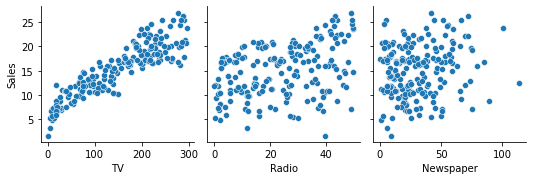

In [9]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=df)
#TV has good linear relation with Sales

<AxesSubplot:>

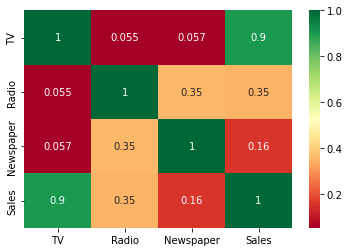

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

In [12]:
X=df['TV']
y=df['Sales']

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)
lr=LinearRegression()


In [17]:
X_train.shape

(140,)

In [18]:
X_lr=X_train.values.reshape(-1,1)
X_lr.shape

(140, 1)

In [19]:
lr.fit(X_lr,y_train)

LinearRegression()

In [20]:
print(lr.coef_)
print(lr.intercept_)

[0.05454575]
6.948683200001357


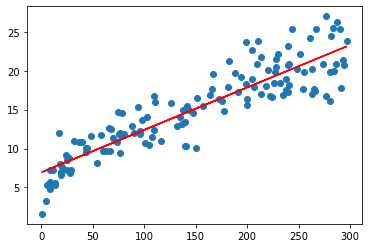

In [21]:
plt.scatter(X_train,y_train)
plt.plot(X_train,lr.predict(X_lr),'r')

C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

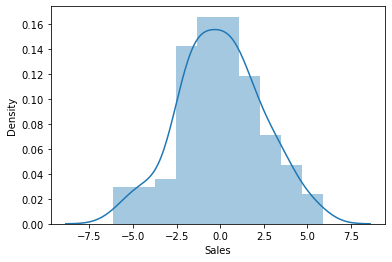

In [22]:
residue=y_train-lr.predict(X_lr)
sns.distplot(residue)

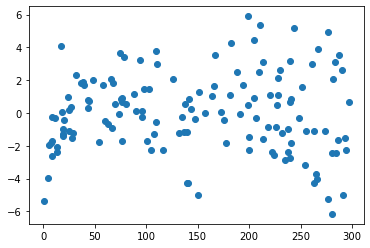

In [24]:

plt.scatter(X_train,residue)

In [26]:
#evaluate test
from sklearn.metrics import r2_score

print(r2_score(y_test,lr.predict(X_test.values.reshape(-1,1))))
print(r2_score(y_train,lr.predict(X_train.values.reshape(-1,1))))

0.7921031601245662
0.8157933136480389


C:\Users\manis\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

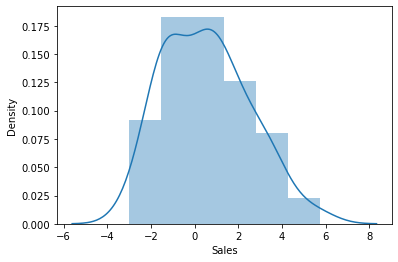

In [27]:
sns.distplot(y_test-lr.predict(X_test.values.reshape(-1,1)))